## 1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.(SVM, LR, RF, DT, KNN), KNN)

2. 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

4. 3번과 동일하지만 dense layer만 사용한 신경만 추후 실시 시험을 통한 평가예정

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/syk98/Desktop/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


## data 확인

In [10]:
# 데이터 확인
df


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [12]:
# 컬렴명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

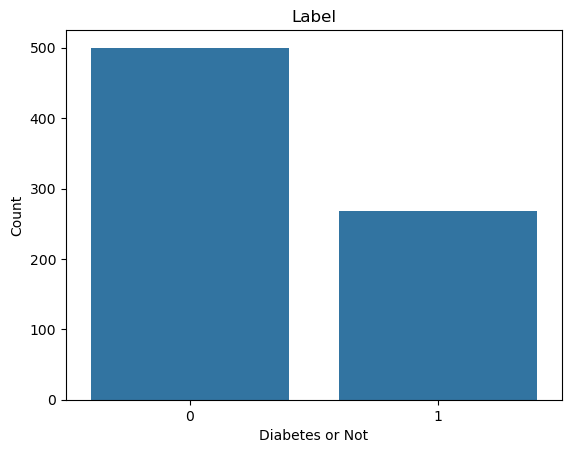

In [14]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Label")

In [18]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\syk98\AppData\Local\Temp\ipykernel_7820\1855077077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'], kde = True, hist = False, ax=ax1)
C:\Users\syk98\AppData\Local\Temp\ipykernel_7820\1855077077.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'

<Axes: xlabel='BMI', ylabel='Density'>

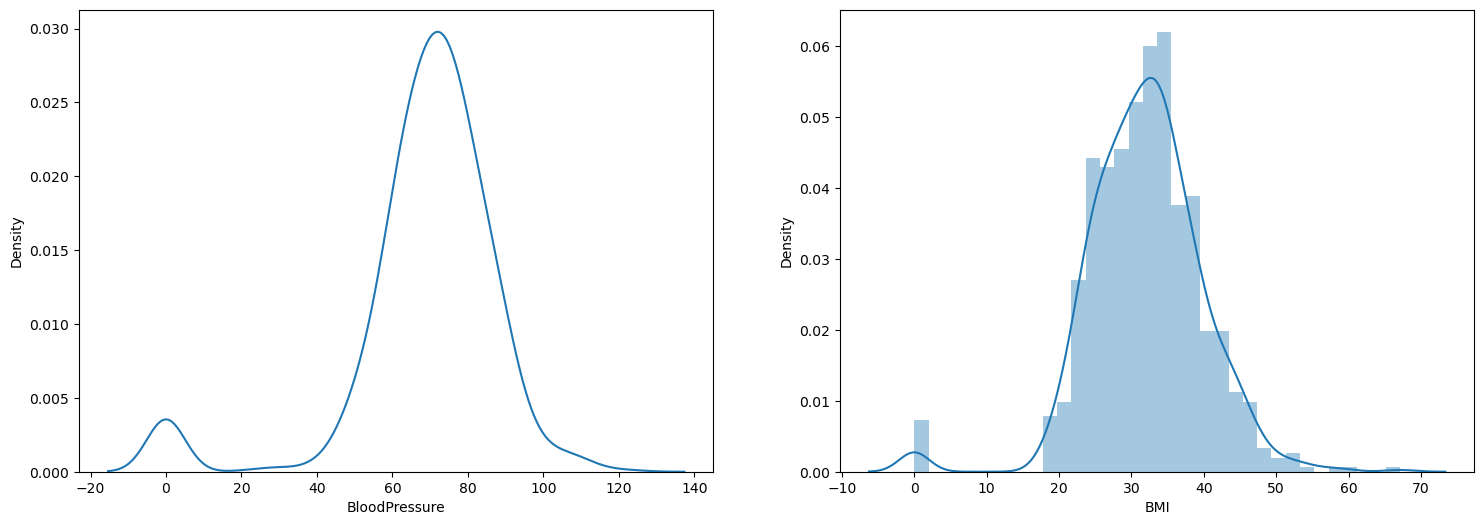

In [38]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['BloodPressure'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['BMI'], ax=ax2)

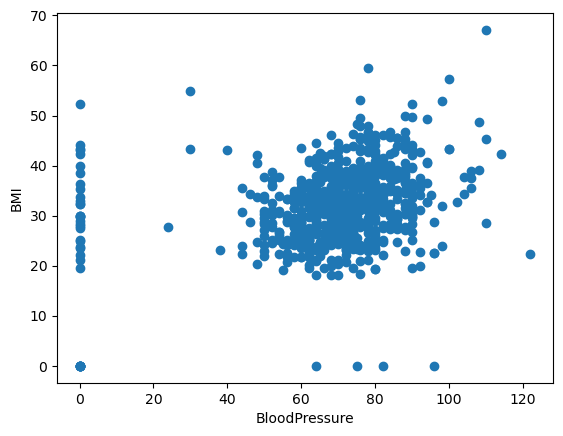

In [40]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['BloodPressure'], df['BMI'])
plt.xlabel('BloodPressure')
plt.ylabel('BMI')

plt.show()

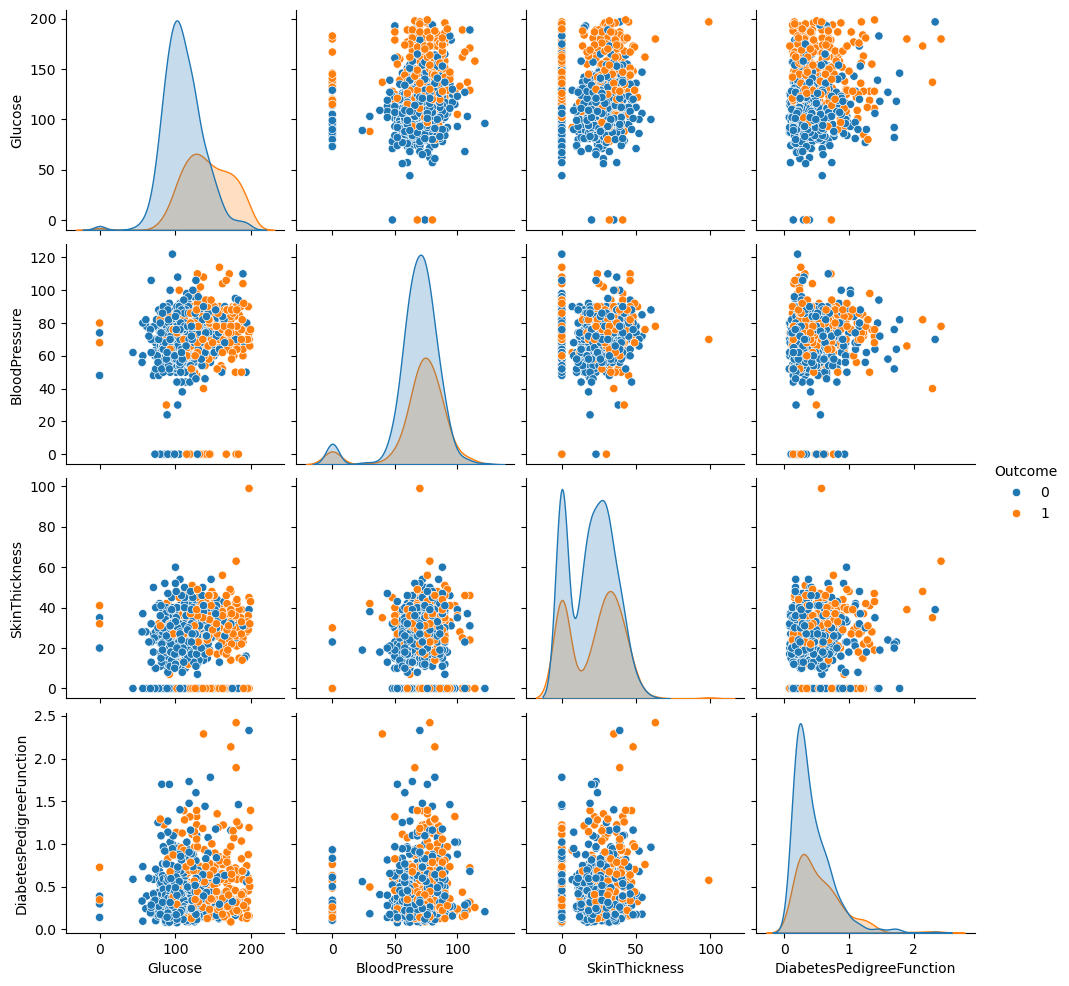

In [50]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction'],
            hue ='Outcome')
plt.show()

C:\Users\syk98\AppData\Local\Temp\ipykernel_7820\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


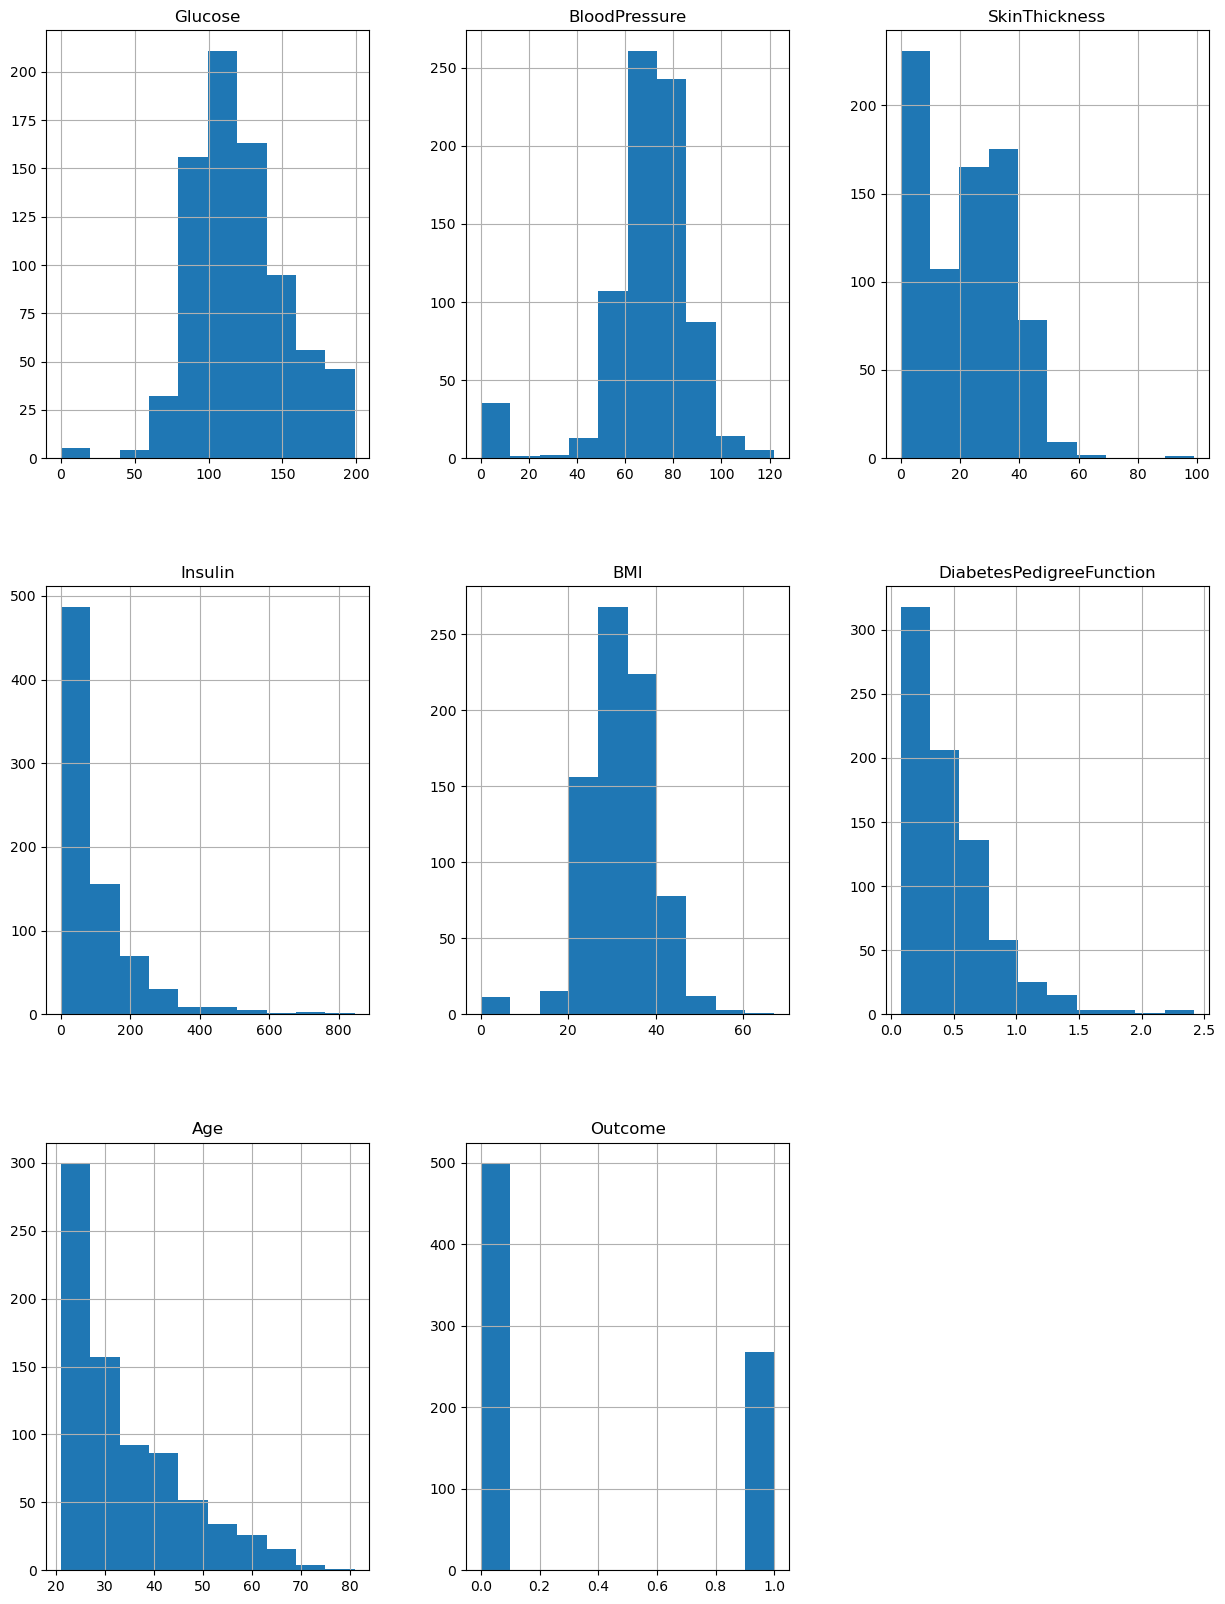

In [52]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

## data/label & train/test dataset 나누기

In [86]:
X = df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [88]:
y=df['Outcome']
y.value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

## 모델 생성, 예측, 분류

In [90]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## SVM

In [113]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7291666666666666
[[106  17]
 [ 35  34]]


## LR

In [116]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.734375
[[100  23]
 [ 28  41]]


## RF

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7395833333333334
[[95 28]
 [22 47]]


## DT

In [122]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.6666666666666666
[[82 41]
 [23 46]]


## KNN

In [125]:
clf_nn = MLPClassifier(random_state=42)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6979166666666666
[[100  23]
 [ 35  34]]
